<a href="https://colab.research.google.com/github/holoho/ai_14_section1/blob/main/%5B%EC%9E%AC%EC%A0%9C%EC%B6%9C%5Dai14_%EC%9D%B4%EB%8F%99%EA%B7%9C_section1(%EC%88%98%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!pip install scipy --upgrade;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from scipy import stats
import scipy

scipy.__version__

'1.7.3'

In [4]:
# 데이터셋 불러오기
df =pd.read_csv('/content/drive/MyDrive/AI/section1project/vgames2.csv', index_col=0)
df.shape

(16598, 9)

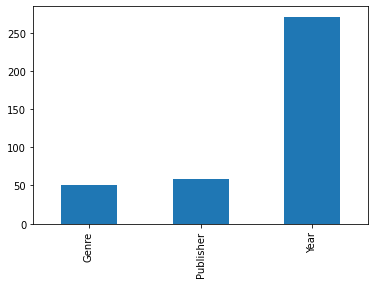

In [5]:
# 결측치 확인 및 시각화
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [6]:
# 결측치 수량 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df = df.dropna() # 결측치 제거
df.isnull().sum() # 결측치 재확인

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [8]:
df = df.drop_duplicates() # 중복치 제거
df.shape

(16241, 9)

In [9]:
display(df.Platform.unique())
display(len(df.Platform.unique()))
display(df.Genre.unique())
display(len(df.Genre.unique()))
display(df.Publisher.unique())
display(len(df.Publisher.unique()))
display(df.Year.unique())

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

31

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

12

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

575

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03,
       1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03, 1.100e+01,
       1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03, 1.983e+03,
       1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01, 6.000e+00,
       8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01,
       9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01, 9.500e+01,
       2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01, 0.000e+00,
       1.200e+01, 9.400e+01])

In [10]:
df['Year'] = df['Year'].astype('int')
df= df[df.Year > 1900]

In [11]:
df['Platform'].replace('2600', 'Atari', inplace=True)

In [12]:
import re

def has_errors(inputString):
  return bool(re.search('[M,K]', inputString))

In [13]:
df_cc = df.JP_Sales.apply(has_errors)
enn = df[df_cc]
enn

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
90,Bugs Bunny: Lost in Time,PS,1999,Platform,Infogrames,0.22,0.15,0K,0.03
91,Tom Clancy's Ghost Recon: Predator,PSP,2010,Shooter,Ubisoft,0.07,0.02,0K,0.02
494,Rise of Nightmares,X360,2011,Action,Sega,0.28,0.13,0.01M,0.04
585,Imagine: Figure Skater (US sales),DS,2007,Sports,Ubisoft,0.46,0.01,0M,0
...,...,...,...,...,...,...,...,...,...
16316,MX World Tour Featuring Jamie Little,PS2,2005,Racing,Play It,0.08,0.07,0K,0.02
16322,Tomb Raider: The Prophecy,GBA,2002,Action,Ubisoft,0.1,0.04,0K,0
16477,NBA Ballers: Chosen One,PS3,2008,Sports,Midway Games,0.12,0,0K,0.01
16500,Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006,Action,505 Games,0,0,0.07M,0


In [14]:
df = df[~df['NA_Sales'].str.contains("[M|K]", na=True, case=False)]
df = df[~df['EU_Sales'].str.contains("[M|K]", na=True, case=False)]
df = df[~df['Other_Sales'].str.contains("[M|K]", na=True, case=False)]
df = df[~df['JP_Sales'].str.contains("[M|K]", na=True, case=False)]
df['NA_Sales'] = df['NA_Sales'].astype('float')
df['EU_Sales'] = df['EU_Sales'].astype('float')
df['Other_Sales'] = df['Other_Sales'].astype('float')
df['JP_Sales'] = df['JP_Sales'].astype('float')
df.reset_index(drop=True, inplace=True)

In [15]:
df['Worldwide_Sales'] = df['NA_Sales']+df['Other_Sales']+df['JP_Sales']+df['EU_Sales']
df.shape

(15382, 10)

In [16]:
df["Genre"].value_counts().reset_index()[:10]

,index,Genre
0,Action,3077
1,Sports,2185
2,Misc,1584
3,Role-Playing,1384
4,Adventure,1219
5,Shooter,1213
6,Racing,1151
7,Platform,809
8,Simulation,801
9,Fighting,794


In [17]:
df["Platform"].value_counts().reset_index()[:10]

,index,Platform
0,DS,2020
1,PS2,2013
2,PS3,1227
3,Wii,1217
4,X360,1171
5,PSP,1130
6,PS,1114
7,PC,884
8,XB,758
9,GBA,743


In [18]:
df["Year"].value_counts().reset_index()[:10]

,index,Year
0,2008,1353
1,2009,1352
2,2010,1187
3,2007,1124
4,2011,1078
5,2006,951
6,2005,895
7,2002,792
8,2003,727
9,2004,700


In [19]:
df["Publisher"].value_counts().reset_index()[:10]

,index,Publisher
0,Electronic Arts,1266
1,Activision,921
2,Namco Bandai Games,872
3,Ubisoft,867
4,Konami Digital Entertainment,776
5,THQ,682
6,Nintendo,658
7,Sony Computer Entertainment,645
8,Sega,593
9,Take-Two Interactive,385


In [20]:
df["Name"].value_counts().reset_index()[:10]

,index,Name
0,Need for Speed: Most Wanted,11
1,LEGO Marvel Super Heroes,9
2,FIFA Soccer 13,8
3,LEGO The Hobbit,8
4,Angry Birds Star Wars,8
5,Terraria,8
6,The LEGO Movie Videogame,8
7,Ratatouille,8
8,Lego Batman 3: Beyond Gotham,8
9,Cars,8


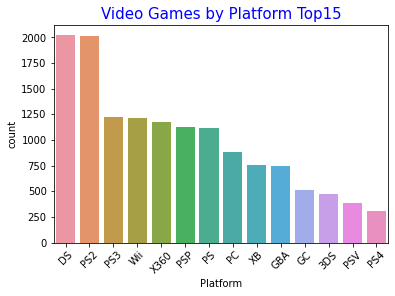

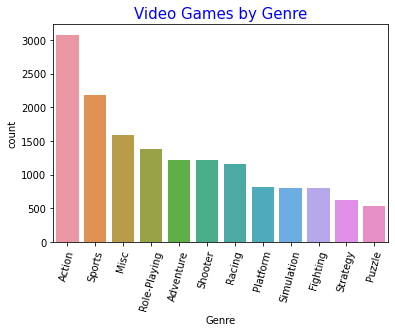

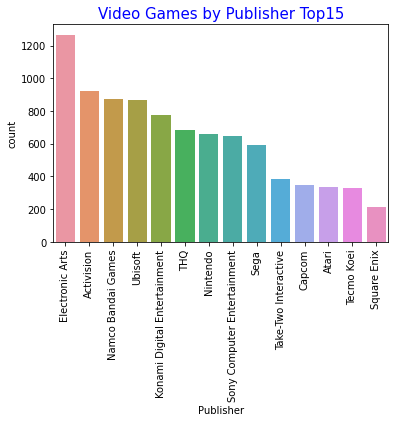

In [21]:
plt.subplots(1,1)
sns.countplot(df.Platform, order=df.Platform.value_counts().iloc[:14].index)
plt.xticks(rotation= 45)
plt.title("Video Games by Platform Top15",color = 'blue',fontsize=15)
plt.show()

plt.subplots(1,1)
sns.countplot(df.Genre, order=df.Genre.value_counts().index)
plt.title("Video Games by Genre",color = 'blue',fontsize=15)
plt.xticks(rotation= 75)
plt.show()

plt.subplots(1,1)
sns.countplot(df.Publisher, order=df.Publisher.value_counts().iloc[0:14].index)
plt.title("Video Games by Publisher Top15",color = 'blue',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

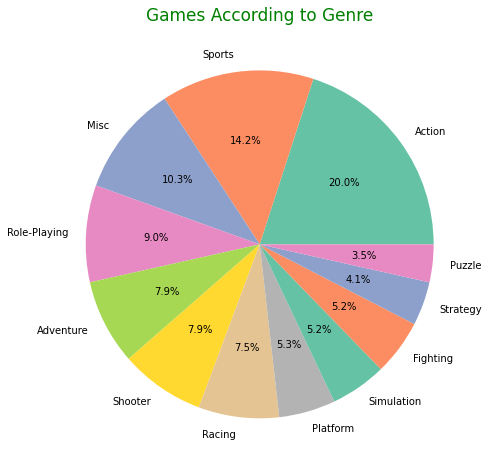

In [22]:
#Games according to Genre
labels=df.Genre.value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0]
sizes = df.Genre.value_counts().values
# visual
plt.figure(figsize = (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Games According to Genre',fontsize = 17,color = 'green');

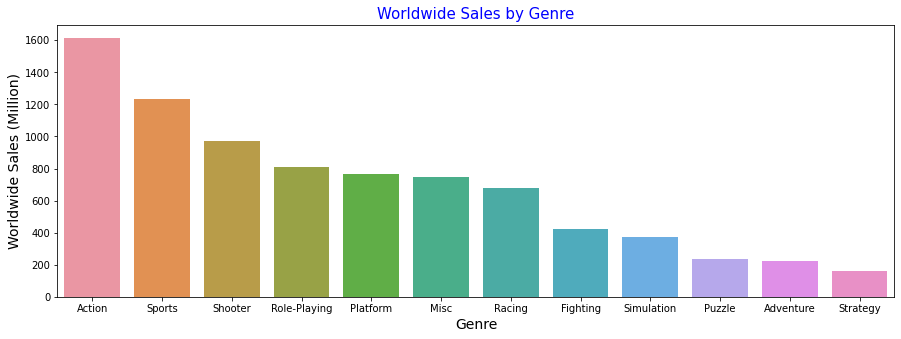

In [60]:
total_sales_genre = df.groupby('Genre')['Worldwide_Sales'].sum().sort_values(ascending=False)
order_sales_genre = df.groupby('Genre')['Worldwide_Sales'].sum().sort_values(ascending=False).index

plt.figure(figsize=(15, 5))
sns.barplot(x=order_sales_genre, y=total_sales_genre, order=order_sales_genre)
plt.xticks(rotation= 0)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Worldwide Sales (Million)', fontsize=14)
plt.title('Worldwide Sales by Genre', color = 'blue', fontsize=15)
plt.show()

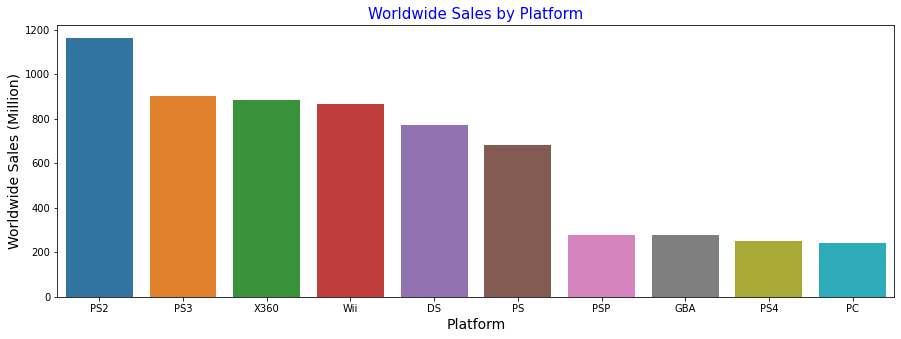

In [61]:
total_sales_platform = df.groupby('Platform')['Worldwide_Sales'].sum().sort_values(ascending=False).iloc[0:10]
order_sales_platform = total_sales_platform.index

plt.figure(figsize=(15, 5))
sns.barplot(x=order_sales_platform, y=total_sales_platform, order=order_sales_platform)
plt.xticks(rotation= 0)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Worldwide Sales (Million)', fontsize=14)
plt.title('Worldwide Sales by Platform', color = 'blue', fontsize=15)
plt.show()

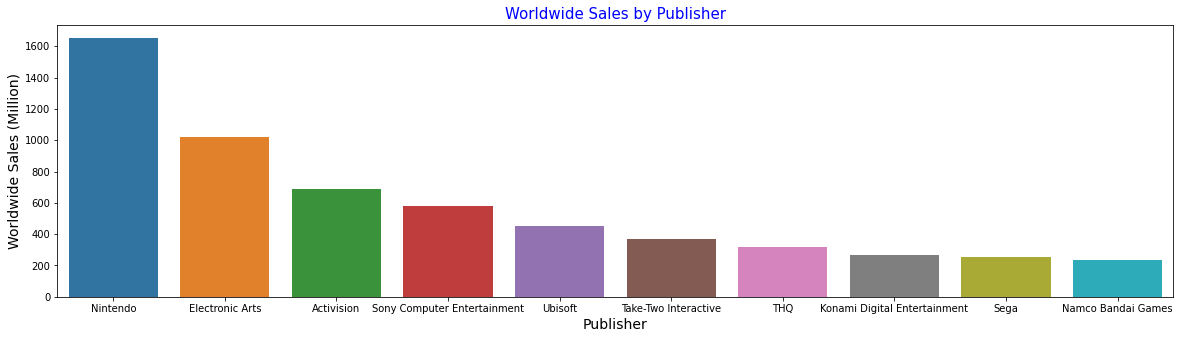

In [62]:
total_sales_publisher = df.groupby('Publisher')['Worldwide_Sales'].sum().sort_values(ascending=False).iloc[0:10]
order_sales_publisher = total_sales_publisher.index

plt.figure(figsize=(20, 5))
sns.barplot(x=order_sales_publisher, y=total_sales_publisher, order=order_sales_publisher)
plt.xticks(rotation= 0)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Worldwide Sales (Million)', fontsize=14)
plt.title('Worldwide Sales by Publisher', color = 'blue', fontsize=15)
plt.show()

In [23]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [26]:
total_sales_year = df.groupby('Year')['Worldwide_Sales'].sum()
total_sales_year_index = df.groupby('Year')['Worldwide_Sales'].sum().index

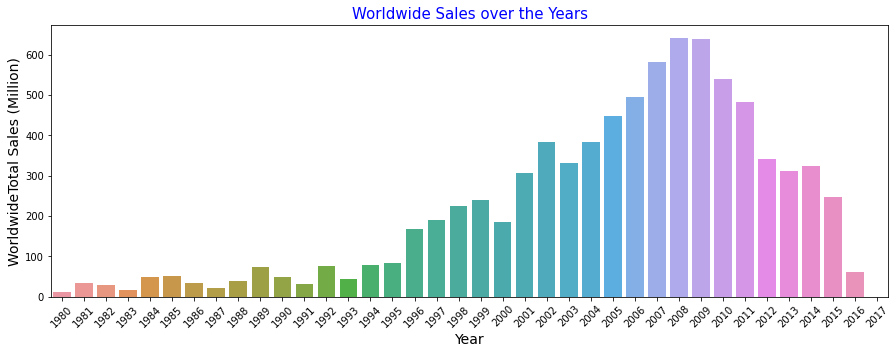

In [27]:
plt.figure(figsize=(15, 5))
sns.barplot(x=total_sales_year_index, y=total_sales_year)
plt.xticks(rotation= 45)
plt.xlabel('Year', fontsize=14)
plt.ylabel('WorldwideTotal Sales (Million)', fontsize=14)
plt.title('Worldwide Sales over the Years', color = 'blue', fontsize=15)
plt.show()

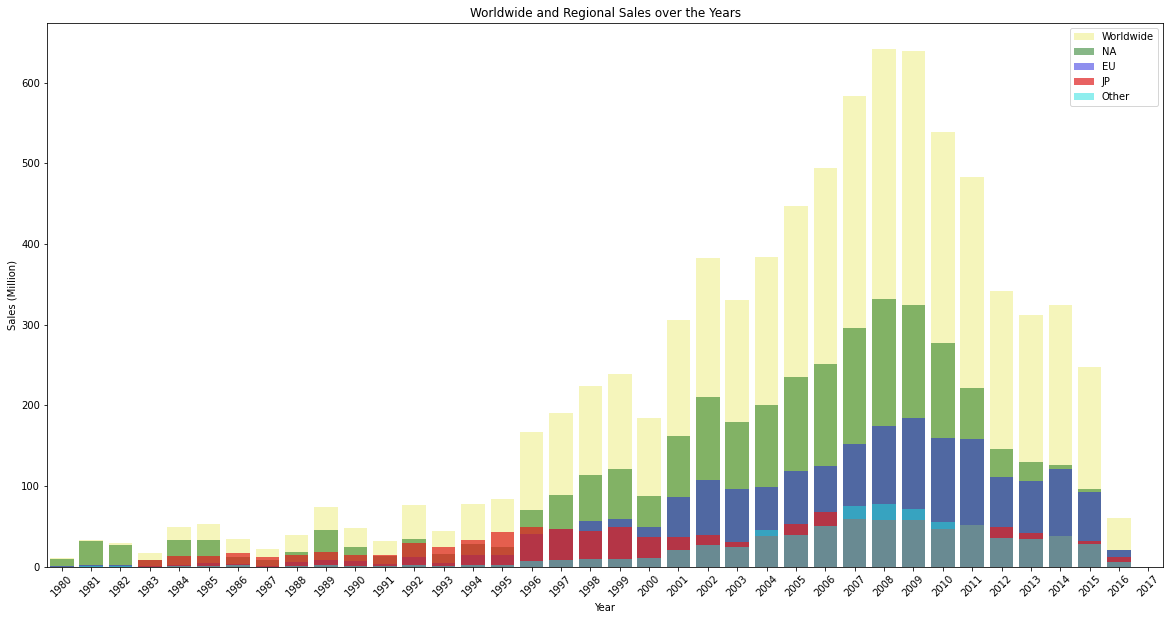

In [28]:
na_sales_year = df.groupby('Year')['NA_Sales'].sum()
na_sales_year_index = df.groupby('Year')['NA_Sales'].sum().index
eu_sales_year = df.groupby('Year')['EU_Sales'].sum()
eu_sales_year_index = df.groupby('Year')['EU_Sales'].sum().index
jp_sales_year = df.groupby('Year')['JP_Sales'].sum()
jp_sales_year_index = df.groupby('Year')['JP_Sales'].sum().index
other_sales_year = df.groupby('Year')['Other_Sales'].sum()
other_sales_year_index = df.groupby('Year')['Other_Sales'].sum().index

# visualization
f,ax = plt.subplots(figsize = (20,10))
sns.barplot(y=total_sales_year, x=total_sales_year_index, color='yellow',alpha = 0.3,label='Worldwide' )
sns.barplot(y=na_sales_year, x=na_sales_year_index,color='green',alpha = 0.5,label='NA' )
sns.barplot(y=eu_sales_year, x=eu_sales_year_index, color='blue',alpha = 0.5,label='EU')
sns.barplot(y=jp_sales_year, x=jp_sales_year_index,color='red',alpha = 0.7,label='JP')
sns.barplot(y=other_sales_year, x=other_sales_year_index, color='cyan',alpha = 0.5,label='Other')

plt.xticks(rotation= 45)
ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='Year', ylabel='Sales (Million)',title = "Worldwide and Regional Sales over the Years")
plt.show()

In [25]:
# 연도별 게임 트랜드
df_year = df.groupby(['Year','Genre'])['Worldwide_Sales'].sum().reset_index()
idx = df_year.groupby(['Year'])['Worldwide_Sales'].transform(max) == df_year['Worldwide_Sales']
df_year[idx]

,Year,Genre,Worldwide_Sales
3,1980,Shooter,7.07
4,1981,Action,12.82
14,1982,Puzzle,10.04
21,1983,Platform,6.93
30,1984,Shooter,31.10
34,1985,Platform,41.67
39,1986,Action,13.74
47,1987,Fighting,5.42
53,1988,Platform,20.27
63,1989,Puzzle,37.69


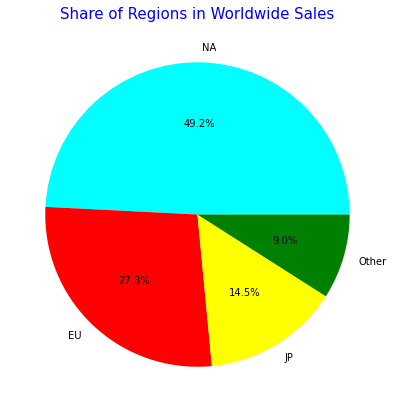

In [29]:
sales_region = [df.NA_Sales.sum(),df.EU_Sales.sum(),df.JP_Sales.sum(),df.Other_Sales.sum()]
labels = ['NA', 'EU', 'JP', 'Other']
colors = ['cyan','red','yellow','green']

# visual
plt.figure(figsize = (7,7))
plt.pie(sales_region, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Share of Regions in Worldwide Sales', color = 'blue', fontsize = 15)
plt.show()

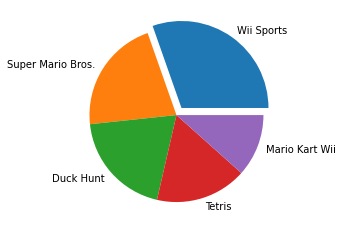

In [30]:
top_games_NA = df.sort_values('NA_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_NA['NA_Sales'], labels = top_games_NA['Name'], explode = explode)
plt.show()

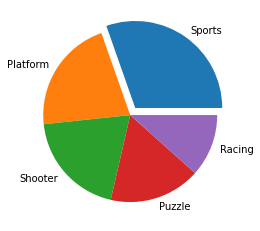

In [31]:
top_games_NA = df.sort_values('NA_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_NA['NA_Sales'], labels = top_games_NA['Genre'], explode = explode)
plt.show()

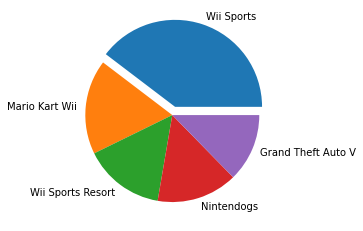

In [32]:
top_games_EU = df.sort_values('EU_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_EU['EU_Sales'], labels = top_games_EU['Name'], explode = explode)
plt.show()

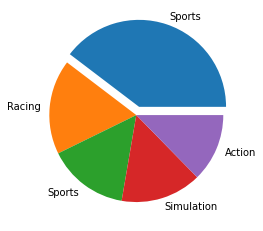

In [33]:
top_games_EU = df.sort_values('EU_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_EU['EU_Sales'], labels = top_games_EU['Genre'], explode = explode)
plt.show()

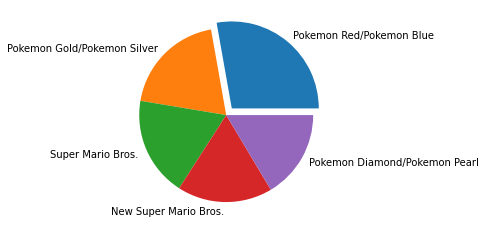

In [34]:
top_games_JP = df.sort_values('JP_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_JP['JP_Sales'], labels = top_games_JP['Name'], explode = explode)
plt.show()

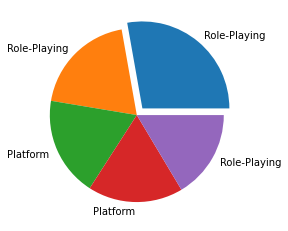

In [35]:
top_games_JP = df.sort_values('JP_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_JP['JP_Sales'], labels = top_games_JP['Genre'], explode = explode)
plt.show()

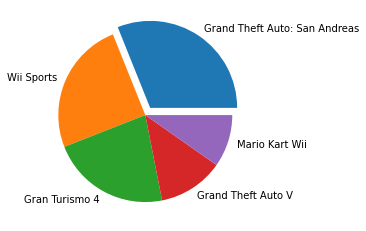

In [36]:
top_games_Other = df.sort_values('Other_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_Other['Other_Sales'], labels = top_games_Other['Name'], explode = explode)
plt.show()

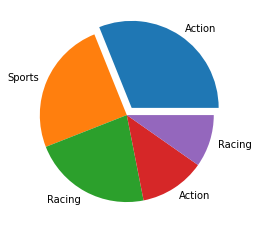

In [37]:
top_games_Other = df.sort_values('Other_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_Other['Other_Sales'], labels = top_games_Other['Genre'], explode = explode)
plt.show()

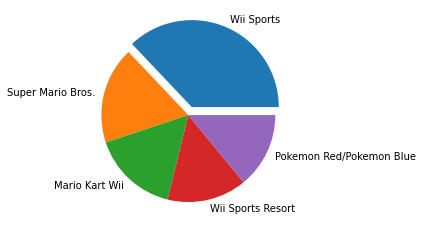

In [38]:
top_games_worldwide = df.sort_values('Worldwide_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_worldwide['Worldwide_Sales'], labels = top_games_worldwide['Name'], explode = explode)
plt.show()

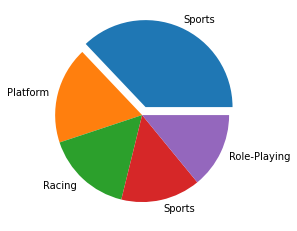

In [39]:
top_games_worldwide = df.sort_values('Worldwide_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_worldwide['Worldwide_Sales'], labels = top_games_worldwide['Genre'], explode = explode)
plt.show()

In [40]:
df_wii = df.loc[df.Name.str.contains("Wii")]
df_wii.index = range(len(df_wii)) #reset_index와 같은 효과
print('Wii Series : ', len(df_wii))
df_wii.head()

Wii Series :  47


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
0,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01
1,Just Dance Wii U,WiiU,2014,Misc,Nintendo,0.00,0.00,0.09,0.00,0.09
2,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",PS3,2007,Action,Activision,0.32,0.04,0.01,0.04,0.41
3,Jikkyou Powerful Pro Yakyuu Wii Ketteiban,Wii,2007,Sports,Konami Digital Entertainment,0.00,0.00,0.03,0.00,0.03
4,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",X360,2007,Action,Activision,0.51,0.05,0.00,0.05,0.61


In [41]:
df_pokemon = df.loc[df.Name.str.contains("Pokemon")]
df_pokemon.index = range(len(df_pokemon)) 
print('Pokemon Series : ', len(df_pokemon))
df_pokemon.head()


Pokemon Series :  32


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
0,Pokemon Trozei!,DS,2005,Puzzle,Nintendo,0.26,0.00,0.31,0.02,0.59
1,Pokemon Conquest,DS,2012,Role-Playing,Nintendo,0.58,0.06,0.37,0.04,1.05
2,Pokemon Art Academy,3DS,2014,Misc,Nintendo,0.18,0.12,0.16,0.03,0.49
3,Pokemon Rumble Blast,3DS,2011,Action,Nintendo,0.47,0.26,0.35,0.07,1.15
4,Pokemon Mystery Dungeon: Explorers of Sky,DS,2009,Role-Playing,Nintendo,0.58,0.44,0.44,0.12,1.58


In [42]:
df_mario = df.loc[df.Name.str.contains("Mario")]
df_mario.index = range(len(df_mario)) 
print('Mario Series : ', len(df_mario))
df_mario.head()

Mario Series :  104


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
0,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
1,Mario Golf,N64,1999,Action,Nintendo,0.62,0.18,0.65,0.02,1.47
2,Mario & Sonic at the Olympic Games,DS,2008,Sports,Sega,1.64,2.48,0.44,0.58,5.14
3,Mario Party,N64,1998,Misc,Nintendo,1.25,0.53,0.87,0.05,2.70
4,Mario's Picross,GB,1995,Puzzle,Nintendo,0.00,0.00,0.62,0.00,0.62


In [43]:
df_grand = df[df.Name.str.contains("Grand Theft Auto")]
df_grand.index = range(len(df_grand))
print('GTA Series:', len(df_grand))
df_grand.head()


GTA Series: 25


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
0,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
1,Grand Theft Auto: Vice City Stories,PS2,2007,Action,Take-Two Interactive,0.78,0.03,0.03,0.13,0.97
2,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04
4,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003,Action,Take-Two Interactive,0.85,0.66,0.00,0.22,1.73


In [44]:
print("**** Top rank of 4 series in games ****")

major_game_rate = (len(df_wii) + len(df_mario) + len(df_pokemon)+len(df_grand))/len(df)
print("%.2f%%" % (major_game_rate *100))

**** Top rank of 4 series in games ****
1.35%


In [45]:
df_wii_sales = df_wii['Worldwide_Sales'].sum()
df_grand_sales = df_grand['Worldwide_Sales'].sum()
df_mario_sales = df_mario['Worldwide_Sales'].sum()
df_pokemon_sales = df_pokemon['Worldwide_Sales'].sum()
df_worldwide = df['Worldwide_Sales'].sum()

In [46]:
print("**** Top rank of 4 series_sales in games ****")

major_gamesales_rate = (df_wii_sales + df_mario_sales + df_pokemon_sales+df_grand_sales)/df_worldwide
print("%.2f%%" % (major_gamesales_rate *100))

**** Top rank of 4 series_sales in games ****
13.39%


In [47]:
df_wii_sport = df.loc[df.Name == "Wii Sports", :]
df_wii_sport.index = range(len(df_wii_sport))
print('Wii Sport :', len(df_wii_sport))
df_wii_sport.head()

Wii Sport : 1


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [48]:
df_grand_gta = df.loc[df.Name == "Grand Theft Auto V", :]
df_grand_gta.index = range(len(df_grand_gta)) 
print('GTA', len(df_grand_gta))
df_grand_gta.head()

GTA 4


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
0,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
1,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
3,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


In [49]:
df_mario_super = df.loc[df.Name == "Super Mario Bros.", :]
df_mario_super.index = range(len(df_mario_super)) 
print('Super Mario Bros', len(df_mario_super))
df_mario_super.head()

Super Mario Bros 2


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
0,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1,Super Mario Bros.,GB,1999,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07


In [50]:
df_pokemon_red = df.loc[df.Name == "Pokemon Red/Pokemon Blue", :]
df_pokemon_red.index = range(len(df_pokemon_red)) 
print('pokemon_red/blue', len(df_pokemon_red))
df_pokemon_red.head()

pokemon_red/blue 1


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
0,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.38


In [51]:
print("**** ratio of top 4 games in each game series ****")
print("Mario : %.3f%%" % (len(df_mario_super)/len(df_mario)*100))
print("GTA : %.3f%%" % (len(df_grand_gta)/len(df_grand)*100))
print("Wii : %.3f%%" % (len(df_wii_sport)/len(df_wii)*100))
print("Pokemon : %.3f%%" % (len(df_pokemon_red)/len(df_pokemon)*100))

**** ratio of top 4 games in each game series ****
Mario : 1.923%
GTA : 16.000%
Wii : 2.128%
Pokemon : 3.125%


In [52]:
df_wii_sport_sales = df_wii_sport['Worldwide_Sales']
df_grand_gta_sales = df_grand_gta['Worldwide_Sales'].sum()
df_pokemon_red_sales = df_pokemon_red['Worldwide_Sales'].sum()
df_mario_super_sales =df_mario_super['Worldwide_Sales'].sum()

In [53]:
print("**** ratio of top 4 games sales in each game series ****")
print("Mario : %.3f%%" % (df_mario_super_sales/df_mario_sales*100))
print("GTA : %.3f%%" % (df_grand_gta_sales/df_grand_sales*100))
print("Wii : %.3f%%" % (df_wii_sport_sales/df_wii_sales*100))
print("Pokemon : %.3f%%" % (df_pokemon_red_sales/df_pokemon_sales*100))

**** ratio of top 4 games sales in each game series ****
Mario : 8.864%
GTA : 27.411%
Wii : 28.917%
Pokemon : 19.337%


In [54]:
100*(df[df.Genre=="Sports"].Platform.value_counts() / df[df.Genre=="Sports"].Platform.value_counts().sum())


PS2      16.796339
Wii      11.121281
PS        9.656751
X360      9.565217
PS3       9.061785
XB        7.002288
DS        6.407323
PSP       5.675057
GC        4.530892
GBA       3.981693
N64       3.478261
SNES      2.196796
PC        1.967963
PS4       1.830664
XOne      1.601831
3DS       1.098398
PSV       0.961098
SAT       0.686499
NES       0.594966
GB        0.411899
Atari     0.411899
DC        0.411899
WiiU      0.366133
GEN       0.137300
NG        0.045767
Name: Platform, dtype: float64

In [55]:
100*(df[df.Genre=="Action"].Platform.value_counts() / df[df.Genre=="Action"].Platform.value_counts().sum())

PS3      11.309717
PS2      10.594735
DS       10.399740
X360      9.912252
Wii       7.052324
PSP       6.694833
3DS       5.654859
PC        5.037374
GBA       4.939877
XB        4.744881
PS        4.712382
PSV       4.224894
PS4       3.672408
GC        2.762431
XOne      2.177446
WiiU      2.014950
Atari     1.754956
N64       1.072473
NES       0.422489
SNES      0.389990
GB        0.194995
DC        0.097498
SAT       0.097498
GEN       0.064998
Name: Platform, dtype: float64

In [56]:
100*(df[df.Platform=="Wii"].Genre.value_counts() / df[df.Platform=="Wii"].Genre.value_counts().sum())

Misc            20.788825
Sports          19.967132
Action          17.830731
Racing           7.066557
Adventure        6.655711
Simulation       6.409203
Shooter          4.683648
Platform         4.437141
Puzzle           4.190633
Fighting         3.122432
Role-Playing     2.875924
Strategy         1.972062
Name: Genre, dtype: float64

In [57]:
100*(df[df.Platform=="PS3"].Genre.value_counts() / df[df.Platform=="PS3"].Genre.value_counts().sum())

Action          28.361858
Sports          16.136919
Shooter         12.387938
Role-Playing     8.964955
Misc             8.801956
Racing           6.764466
Adventure        5.867971
Fighting         5.704971
Platform         2.770986
Simulation       2.363488
Strategy         1.711491
Puzzle           0.162999
Name: Genre, dtype: float64

In [58]:
100*(df[df.Platform=="X360"].Genre.value_counts() / df[df.Platform=="X360"].Genre.value_counts().sum())

Action          26.046114
Sports          17.847993
Shooter         15.627669
Misc             9.991460
Racing           8.198121
Role-Playing     5.892400
Fighting         5.209223
Adventure        3.928266
Simulation       2.988898
Strategy         2.049530
Platform         1.878736
Puzzle           0.341588
Name: Genre, dtype: float64

In [59]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go


In [63]:
import plotly as py


In [64]:
df_c = df.copy()

In [65]:
df_c = df.loc[(df['Genre'] == 'Action') | (df['Genre'] == 'Adventure') | (df['Genre'] == 'Sport') | (df['Genre'] == 'Role-Playing')]

In [66]:
df_s = df_c.loc[(df_c['Platform'] == 'Wii') | (df_c['Platform'] == 'PS3') | (df_c['Platform'] == 'X360')]

In [67]:
df_s = df_s[['Year','Name','Platform','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Worldwide_Sales']]

In [68]:
dfm = pd.melt(df_s, id_vars=['Name','Year','Genre','Platform'], var_name='Countries', value_name='Sales')

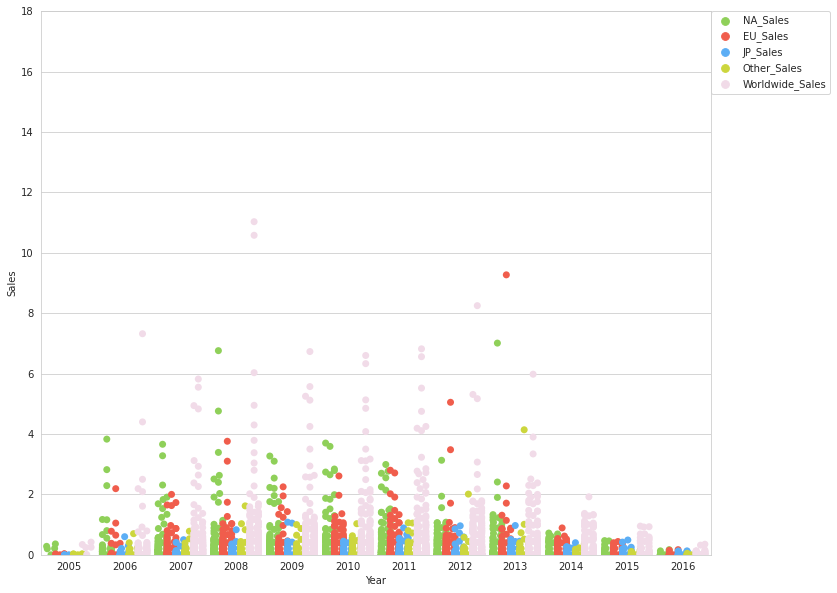

In [69]:
sns.set_style("whitegrid")
with sns.color_palette(["#8ED752", "#F95643", "#53AFFE","#D3DE35", "#F2DAE8"], n_colors=5, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 18)
    sns.swarmplot(x="Year", y="Sales", data=dfm, hue="Countries", split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

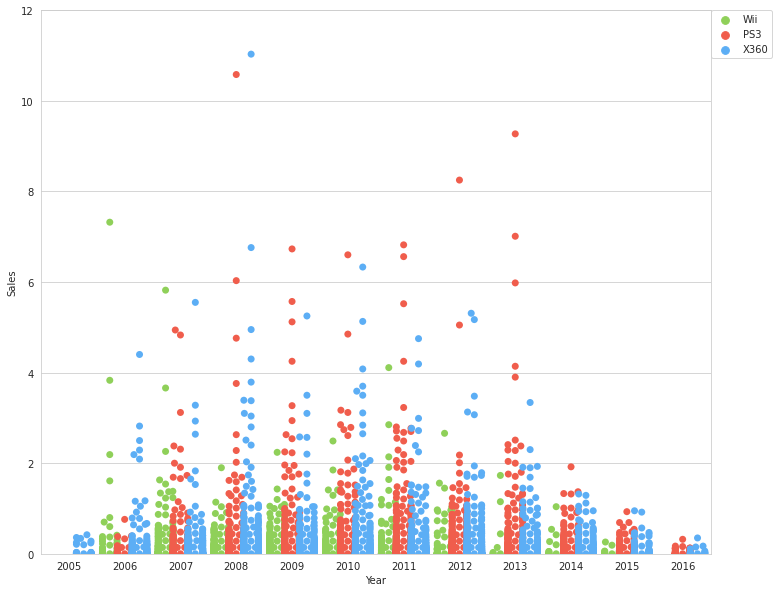

In [70]:
sns.set_style("whitegrid")
with sns.color_palette(["#8ED752", "#F95643", "#53AFFE"], n_colors=3, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 12)
    sns.swarmplot(x="Year", y="Sales", data=dfm, hue="Platform", split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

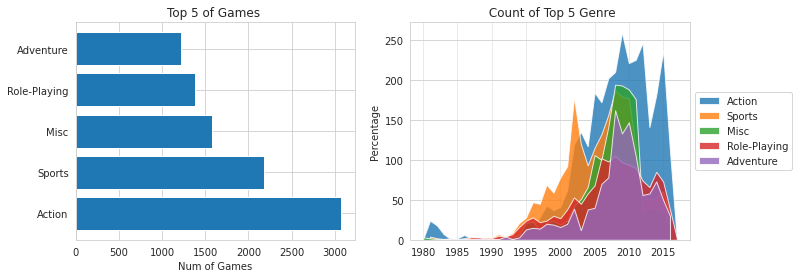

In [71]:
top_5_genre = df.Genre.value_counts().nlargest(5)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11, 4))

data_to_plot = df.Genre.value_counts().nlargest(5)
ax1.barh(y=data_to_plot.index, width=data_to_plot.values)
ax1.set_title("Top 5 of Games ")
ax1.set_xlabel("Num of Games")

for p_name in top_5_genre.index:
    data_to_plot = df[df.Genre==p_name].Year.value_counts().sort_index()
    ax2.stackplot(data_to_plot.index, data_to_plot, labels=[p_name], alpha=0.8)

ax2.set_title(" Count of Top 5 Genre")
ax2.set_ylabel("Percentage")
#ax2.set_xticklabels(data_to_plot.index, rotation=90)
ax2.xaxis.grid(True, alpha=0.5)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [72]:
100*(df.Genre.value_counts().nlargest(5).sum() / df.shape[0])

61.42894292029645

In [73]:
# T test
xy = df.loc[df['Platform'].isin(["PS3", "X360"])]
xy = xy.groupby("Name").filter(lambda x: len(x) == 2)
xy = xy[['Name','Platform','Worldwide_Sales']]
xy

,Name,Platform,Worldwide_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,0.25
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,0.08
14,Mini Ninjas,PS3,0.36
22,Don Bradman Cricket 14,X360,0.01
23,Injustice: Gods Among Us,PS3,1.25
...,...,...,...
15349,Terraria,PS3,0.49
15350,The Voice,PS3,0.02
15353,Way of the Samurai 3,PS3,0.52
15373,MindJack,PS3,0.18


In [74]:
ps3 = xy.loc[xy['Platform'] == "PS3"]
ps3 = ps3.sort_values(by=['Name'])
ps3 = ps3.reset_index(drop=True)
ps3.tail()

,Name,Platform,Worldwide_Sales
723,[Prototype 2],PS3,0.75
724,[Prototype],PS3,1.25
725,de Blob 2,PS3,0.21
726,nail'd,PS3,0.12
727,pro evolution soccer 2011,PS3,2.42


In [75]:
x360 = xy.loc[xy['Platform'] == "X360"]
x360 = x360.sort_values(by=['Name'])
x360 = x360.reset_index(drop=True)
x360.tail()

,Name,Platform,Worldwide_Sales
723,[Prototype 2],X360,0.80
724,[Prototype],X360,1.31
725,de Blob 2,X360,0.15
726,nail'd,X360,0.11
727,pro evolution soccer 2011,X360,0.60


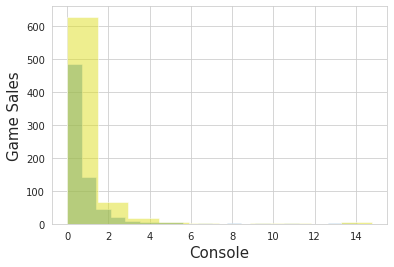

In [76]:
ps3['Worldwide_Sales'].hist(histtype='stepfilled', alpha=.5, bins=20)  
x360['Worldwide_Sales'].hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("yellow", .75), bins=10)
plt.xlabel('Console',fontsize=15)
plt.ylabel('Game Sales',fontsize=15)
plt.show()

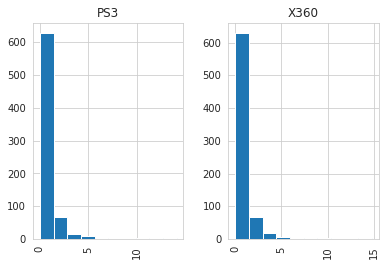

In [77]:
xy.hist(by ='Platform');

In [78]:
console  = ['PS3','X360']
means_c = [ps3[['Worldwide_Sales']].mean().values[0],x360[['Worldwide_Sales']].mean().values[0]]
means_dict = {'Console':console, 'Original Mean':means_c}
means_df =  pd.DataFrame(means_dict) 
means_df

,Console,Original Mean
0,PS3,0.828516
1,X360,0.838283


In [79]:
ps3a = ps3['Worldwide_Sales']
x360a = x360['Worldwide_Sales']

In [80]:
pv2 = stats.ttest_ind(ps3a, x360a, alternative='two-sided').pvalue
pv2 # pvalue > 0.05이므로 귀무가설 기각 실패 

0.8981181086380168

In [81]:
pv3 = stats.ttest_ind(x360a, ps3a, alternative='greater').pvalue
pv3 # pvalue > 0.05이므로 귀무가설 기각 실패 

0.4490590543190084

In [82]:
df['Publisher']

0                          Destineer
1                 Namco Bandai Games
2                          Alchemist
3                          Zoo Games
4                        D3Publisher
                    ...             
15377                  Vivendi Games
15378              Rising Star Games
15379           Take-Two Interactive
15380                     Tecmo Koei
15381    Sony Computer Entertainment
Name: Publisher, Length: 15382, dtype: object

In [83]:
PS = df.loc[df['Publisher'] == 'Sony Computer Entertainment']
PS_1 = df.loc[df['Publisher']=='Take-Two Interactive']

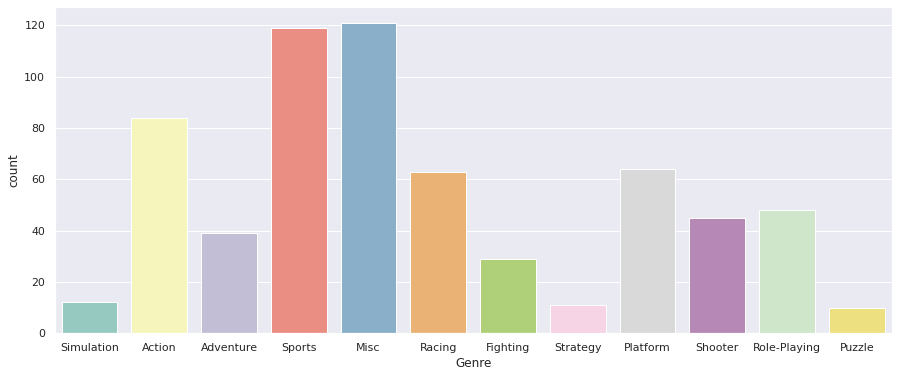

In [84]:
plt.figure(figsize=(15,6))
sns.set_theme(style='darkgrid')
sns.countplot(data=PS,x=PS['Genre'], palette="Set3")

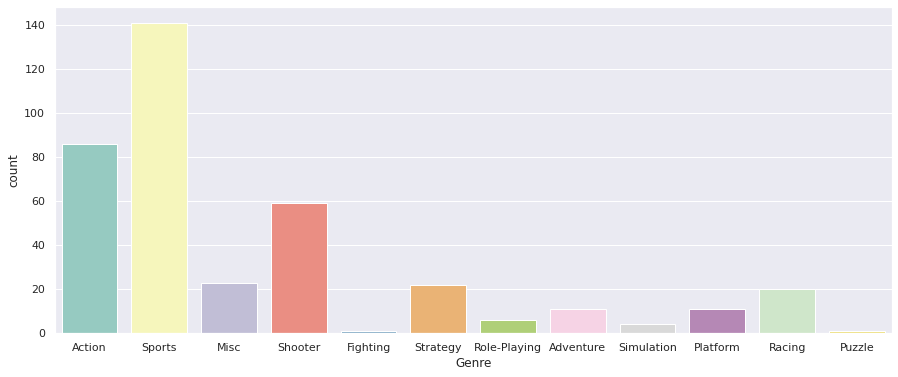

In [85]:
plt.figure(figsize=(15,6))
sns.set_theme(style='darkgrid')
sns.countplot(data=PS_1,x=PS_1['Genre'], palette="Set3")

In [86]:
PS_Action = PS.loc[df['Genre'] == 'Action']
genre_count = len(PS_Action)
print("Count of Genres =",genre_count)

Count of Genres = 84


In [87]:
PS_best_sales = PS.sort_values('Worldwide_Sales', ascending=False).head(5)
PS_best_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
945,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.97
13603,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.65
4488,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
5795,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
10862,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72


In [88]:
PS_1_best_sales = PS_1.sort_values('Worldwide_Sales', ascending=False).head(5)
PS_1_best_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
3250,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
13606,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
4974,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
9091,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
1881,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99


In [89]:
PS_1_Action = PS_1.loc[df['Genre'] == 'Action']
genre_count = len(PS_1_Action)
print("Count of Genres =",genre_count)

Count of Genres = 86


[Text(0.5, 1.0, 'Action - Sales')]

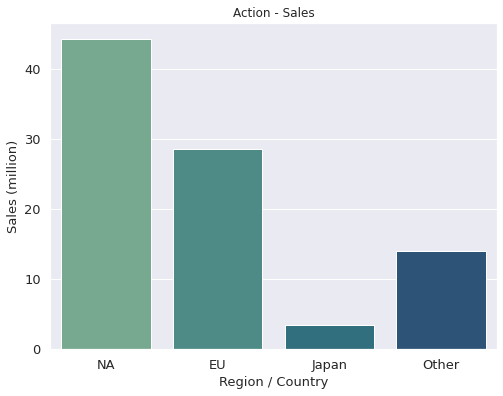

In [90]:
PS_Action_Sales = pd.DataFrame.from_dict({'NA':[PS_Action['NA_Sales'].sum()],'EU':[PS_Action['EU_Sales'].sum()],'Japan':[PS_Action['JP_Sales'].sum()],'Other':[PS_Action['Other_Sales'].sum()]})
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.xlabel("Region / Country",fontsize=13)
plt.ylabel("Sales (million)",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(data=PS_Action_Sales,palette='crest').set(title='Action - Sales')

[Text(0.5, 1.0, 'Action - Sales')]

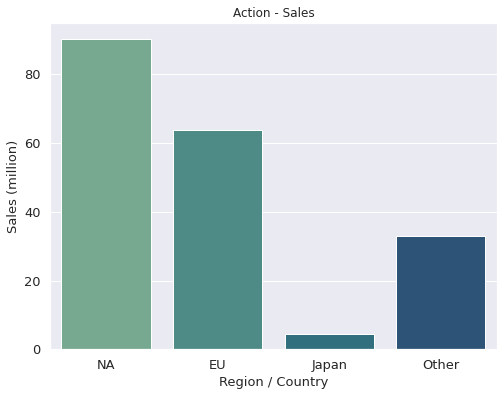

In [91]:
PS_1_Action_Sales = pd.DataFrame.from_dict({'NA':[PS_1_Action['NA_Sales'].sum()],'EU':[PS_1_Action['EU_Sales'].sum()],'Japan':[PS_1_Action['JP_Sales'].sum()],'Other':[PS_1_Action['Other_Sales'].sum()]})
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.xlabel("Region / Country",fontsize=13)
plt.ylabel("Sales (million)",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(data=PS_1_Action_Sales,palette='crest').set(title='Action - Sales')

[Text(0.5, 1.0, 'Action - Platform (Console)')]

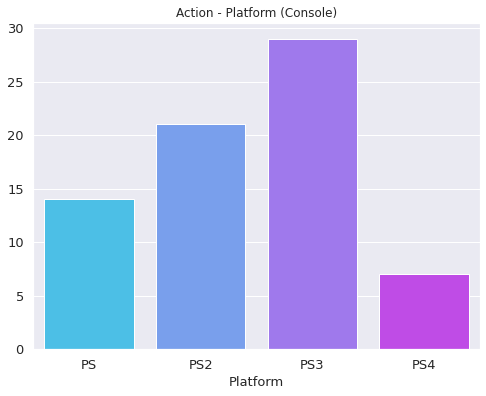

In [92]:
PS_Action_Count = pd.DataFrame.from_dict({'PS': [len(PS_Action.loc[PS_Action['Platform']=='PS'])],'PS2':[len(PS_Action.loc[PS_Action['Platform']=='PS2'])],'PS3':[len(PS_Action.loc[PS_Action['Platform']=='PS3'])],'PS4':[len(PS_Action.loc[PS_Action['Platform']=='PS4'])]})
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
plt.xlabel("Platform",fontsize=13)
plt.ylabel("",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(data=PS_Action_Count,palette='cool').set(title='Action - Platform (Console)')

[Text(0.5, 1.0, 'Action - Platform (Console)')]

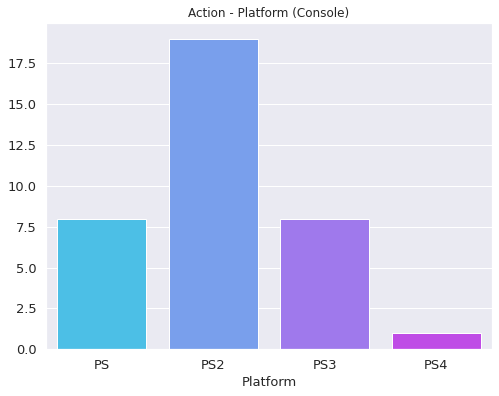

In [93]:
PS_1_Action_Count = pd.DataFrame.from_dict({'PS': [len(PS_1_Action.loc[PS_1_Action['Platform']=='PS'])],'PS2':[len(PS_1_Action.loc[PS_1_Action['Platform']=='PS2'])],'PS3':[len(PS_1_Action.loc[PS_1_Action['Platform']=='PS3'])],'PS4':[len(PS_1_Action.loc[PS_1_Action['Platform']=='PS4'])]})
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
plt.xlabel("Platform",fontsize=13)
plt.ylabel("",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(data=PS_1_Action_Count,palette='cool').set(title='Action - Platform (Console)')

In [94]:
Xbox = df.loc[df['Publisher'] == 'Microsoft Game Studios']

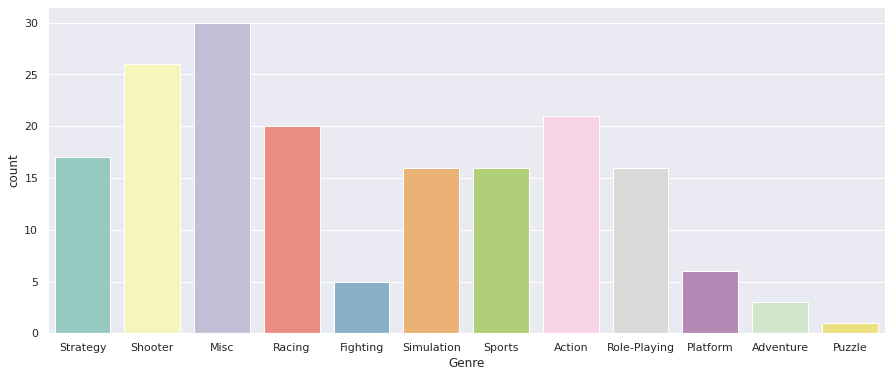

In [95]:
plt.figure(figsize=(15,6))
sns.set_theme(style='darkgrid')
sns.countplot(data=Xbox,x=Xbox['Genre'], palette="Set3")

In [96]:
Xbox_Action = Xbox.loc[df['Genre'] == 'Action']
genre_count = len(Xbox_Action)
print("Count of Genres =",genre_count)

Count of Genres = 21


In [97]:
Xbox_best_sales = Xbox.sort_values('Worldwide_Sales', ascending=False).head(5)
Xbox_best_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
4056,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
5865,Halo 3,X360,2007,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14
13522,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
9282,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
8823,Halo 2,XB,2004,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.48


[Text(0.5, 1.0, 'Action - Sales')]

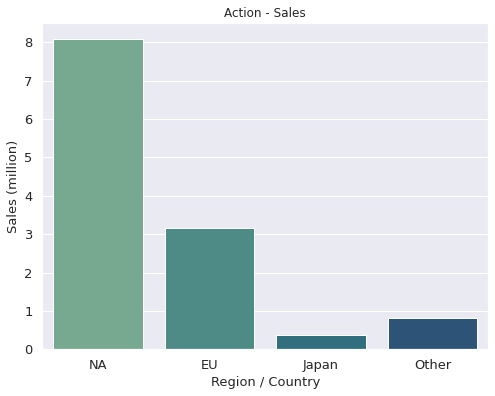

In [98]:
Xbox_Action_Sales = pd.DataFrame.from_dict({'NA':[Xbox_Action['NA_Sales'].sum()],'EU':[Xbox_Action['EU_Sales'].sum()],'Japan':[Xbox_Action['JP_Sales'].sum()],'Other':[Xbox_Action['Other_Sales'].sum()]})
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.xlabel("Region / Country",fontsize=13)
plt.ylabel("Sales (million)",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(data=Xbox_Action_Sales,palette='crest').set(title='Action - Sales')

[Text(0.5, 1.0, 'Action - Platform (Console)')]

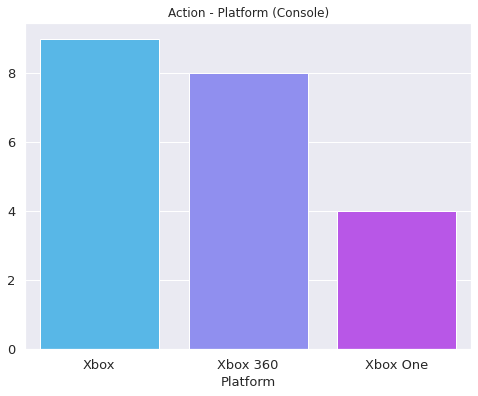

In [99]:
Xbox_Action_Count = pd.DataFrame.from_dict({'Xbox': [len(Xbox_Action.loc[Xbox_Action['Platform']=='XB'])],'Xbox 360':[len(Xbox_Action.loc[Xbox_Action['Platform']=='X360'])],'Xbox One':[len(Xbox_Action.loc[Xbox_Action['Platform']=='XOne'])]})
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
plt.xlabel("Platform",fontsize=13)
plt.ylabel("",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(data=Xbox_Action_Count,palette='cool').set(title='Action - Platform (Console)')

In [100]:
Nintendo = df.loc[df['Publisher'] == 'Nintendo']
len(Nintendo)

658

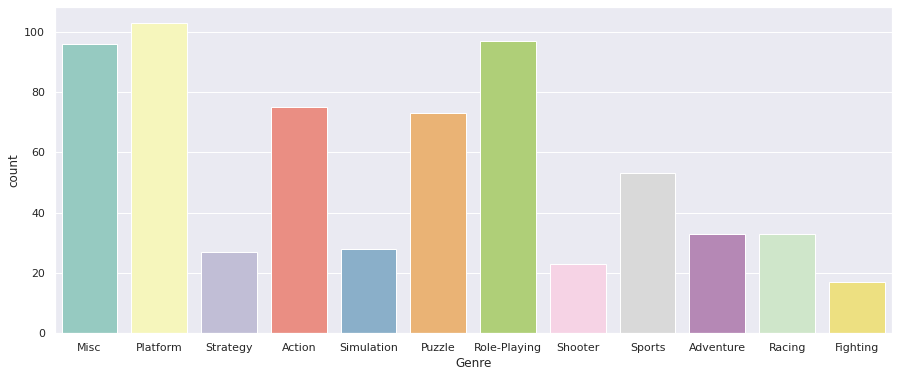

In [101]:
plt.figure(figsize=(15,6))
sns.set_theme(style='darkgrid')
sns.countplot(data=Nintendo,x=Nintendo['Genre'], palette="Set3")

In [102]:
Nintendo_Platform = Nintendo.loc[df['Genre'] == 'Platform']
genre_count = len(Nintendo_Platform)
print("Count of Genres =",genre_count)

Count of Genres = 103


In [103]:
Nintendo_best_sales = Nintendo.sort_values('Worldwide_Sales', ascending=False).head(5)
Nintendo_best_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales
2728,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3919,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
11677,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3135,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7283,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


[Text(0.5, 1.0, 'Platform - Sales')]

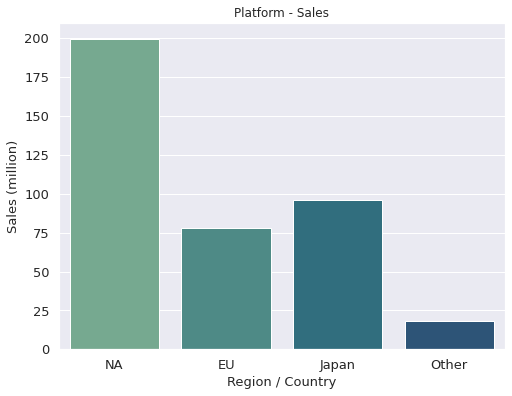

In [104]:
Nintendo_Platform_Sales = pd.DataFrame.from_dict({'NA':[Nintendo_Platform['NA_Sales'].sum()],'EU':[Nintendo_Platform['EU_Sales'].sum()],'Japan':[Nintendo_Platform['JP_Sales'].sum()],'Other':[Nintendo_Platform['Other_Sales'].sum()]})
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.xlabel("Region / Country",fontsize=13)
plt.ylabel("Sales (million)",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(data=Nintendo_Platform_Sales,palette='crest').set(title='Platform - Sales')

In [105]:
Xbox_Sales = Xbox['Worldwide_Sales'].sum()
Nintendo_Sales = Nintendo['Worldwide_Sales'].sum()
PS_Sales = PS['Worldwide_Sales'].sum()
PS_1_Sales = PS_1['Worldwide_Sales'].sum()

[Text(0.5, 1.0, 'Comparison of Xbox, PS and Nintendo - Worldwide Sales')]

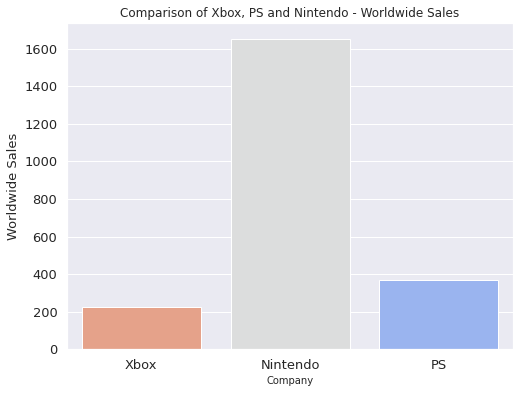

In [106]:
Worldwide_Sales_Combined = pd.DataFrame.from_dict({'Xbox':[Xbox_Sales] ,'Nintendo':[Nintendo_Sales], 'PS' : [PS_1_Sales]})
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
plt.xlabel("Company",fontsize=10)
plt.ylabel("Worldwide Sales",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(data=Worldwide_Sales_Combined,palette='coolwarm_r').set(title='Comparison of Xbox, PS and Nintendo - Worldwide Sales')

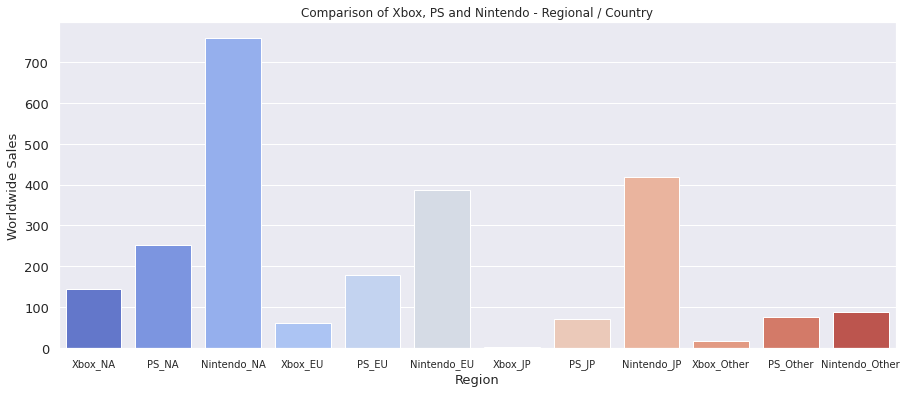

In [107]:
Worldwide_Sales_Region = pd.DataFrame.from_dict({'Xbox_NA': [Xbox['NA_Sales'].sum()] ,'PS_NA': [PS['NA_Sales'].sum()],'Nintendo_NA':[Nintendo['NA_Sales'].sum()],'Xbox_EU': [Xbox['EU_Sales'].sum()], 'PS_EU': [PS['EU_Sales'].sum()], 'Nintendo_EU':[Nintendo['EU_Sales'].sum()],'Xbox_JP': [Xbox['JP_Sales'].sum()],'PS_JP': [PS['JP_Sales'].sum()], 'Nintendo_JP': [Nintendo['JP_Sales'].sum()], 'Xbox_Other': [Xbox['Other_Sales'].sum()] ,'PS_Other': [PS['Other_Sales'].sum()],'Nintendo_Other':[Nintendo['Other_Sales'].sum()]})
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
plt.xlabel("Region",fontsize=13)
plt.ylabel("Worldwide Sales",fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=13)
sns.barplot(data=Worldwide_Sales_Region,palette='coolwarm').set(title='Comparison of Xbox, PS and Nintendo - Regional / Country')
plt.savefig('Worldwide-Sales-by-Region')

In [108]:
Best_Selling = pd.DataFrame.from_dict({'Kinect Adventures! - X360': [Xbox['Worldwide_Sales'].max()], 'Grand Theft Auto - Take-Two-Interactive' :[PS_1['Worldwide_Sales'].max()], 'Wii Sports - Nintendo':[Nintendo['Worldwide_Sales'].max()]})

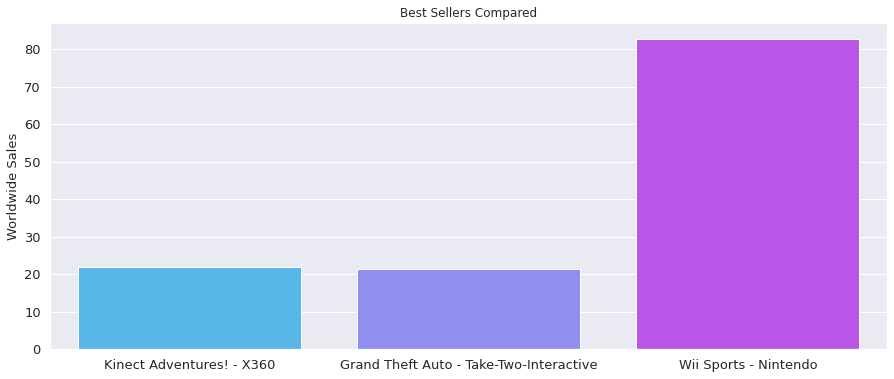

In [109]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
plt.ylabel("Worldwide Sales",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(data=Best_Selling,palette= 'cool').set(title='Best Sellers Compared')
plt.savefig('Best_selling-Game-From-Each-Company')

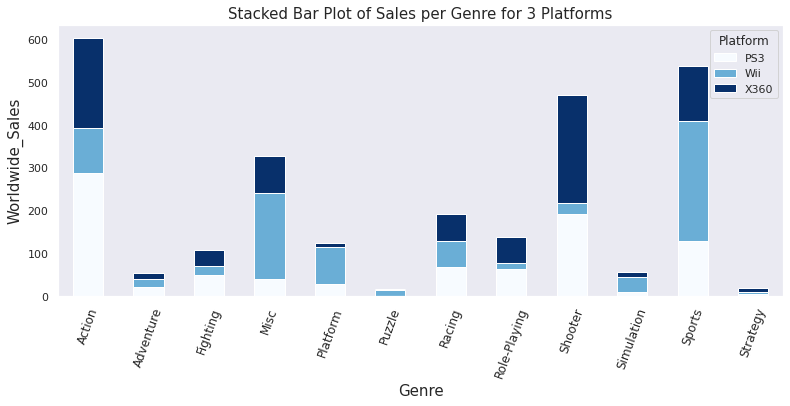

In [130]:
top_3_consoles = df[(df['Platform'] == 'Wii') | (df['Platform'] == 'PS3') | (df['Platform'] == 'X360')]

genre_platform_sales = top_3_consoles.groupby(['Genre','Platform'])['Worldwide_Sales'].sum()
genre_platform_sales.unstack().plot(kind='bar',stacked=True,  colormap='Blues', grid=False, figsize=(13,5));
plt.title('Stacked Bar Plot of Sales per Genre for 3 Platforms', fontsize=15)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Worldwide_Sales', fontsize=15)
plt.xticks(fontsize=12,rotation=70);

In [110]:
from sklearn.cluster import KMeans
import plotly.express as px
X = df.loc[:,'NA_Sales':].values

In [111]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [112]:
df['Clusters'] = kmeans.labels_
df['Clusters'] = df['Clusters'].astype(str)

In [113]:
px.scatter(df,
           x = 'NA_Sales',
           y = 'Worldwide_Sales',
          color = 'Clusters',
          hover_data = ['Name','Genre','Publisher', 'Platform', 'Year'])

In [114]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales,Clusters
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0


In [115]:
low = df[df['Clusters']=='0']
print("3 most frequent Platform in the low category are: {}".format(', '.join(low['Platform'].value_counts().index[:3])))
print("3 most frequent Genre in the low category are: {}".format(', '.join(low['Genre'].value_counts().index[:3])))
print("3 most frequent Publisher in the low category are: {}".format(', '.join(low['Publisher'].value_counts().index[:3])))

3 most frequent Platform in the low category are: DS, PS2, Wii
3 most frequent Genre in the low category are: Action, Sports, Misc
3 most frequent Publisher in the low category are: Electronic Arts, Namco Bandai Games, Activision


In [116]:
low_high = df[df['Clusters']=='3']
print("3 most frequent Platform in the lowhigh category are: {}".format(', '.join(low_high['Platform'].value_counts().index[:3])))
print("3 most frequent Genre in the lowhigh category are: {}".format(', '.join(low_high['Genre'].value_counts().index[:3])))
print("3 most frequent Publisher in the lowhigh category are: {}".format(', '.join(low_high['Publisher'].value_counts().index[:3])))

3 most frequent Platform in the lowhigh category are: PS2, X360, PS3
3 most frequent Genre in the lowhigh category are: Action, Shooter, Sports
3 most frequent Publisher in the lowhigh category are: Nintendo, Electronic Arts, Sony Computer Entertainment


In [117]:
medium = df[df['Clusters']=='1']

print("3 most frequent Platform in the medium category are: {}".format(', '.join(medium['Platform'].value_counts().index[:3])))
print("3 most frequent Genre in the medium category are: {}".format(', '.join(medium['Genre'].value_counts().index[:3])))
print("3 most frequent Publisher in the medium category are: {}".format(', '.join(medium['Publisher'].value_counts().index[:3])))

3 most frequent Platform in the medium category are: Wii, DS, X360
3 most frequent Genre in the medium category are: Shooter, Platform, Action
3 most frequent Publisher in the medium category are: Nintendo, Activision, Take-Two Interactive


In [118]:
high = df[df['Clusters']=='2']

print("The most frequent Platform in the high category are: {}".format(', '.join(high['Platform'].value_counts().index[:3])))
print("The most frequent Genre in the high category are: {}".format(', '.join(high['Genre'].value_counts().index[:3])))
print("The most frequent Publisher in the high category are: {}".format(', '.join(high['Publisher'].value_counts().index[:3])))

The most frequent Platform in the high category are: Wii
The most frequent Genre in the high category are: Sports
The most frequent Publisher in the high category are: Nintendo


In [119]:
from sklearn.preprocessing import LabelEncoder
# label encoding of categorical variables
lbe = LabelEncoder()
df1= df.copy()
df1['Genre_Cat'] = lbe.fit_transform(df['Genre'])
df1['Platform_Cat'] = lbe.fit_transform(df['Platform'])
df1['Publisher_Cat'] = lbe.fit_transform(df['Publisher'])
df1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Worldwide_Sales,Clusters,Genre_Cat,Platform_Cat,Publisher_Cat
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0,0,4,121
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0,0,26,339
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0,1,19,30
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0,3,4,551
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0,4,17,108


In [120]:
df2 = df1.loc[:,'Worldwide_Sales':]
df2.head()

,Worldwide_Sales,Clusters,Genre_Cat,Platform_Cat,Publisher_Cat
0,0.04,0,0,4,121
1,0.18,0,0,26,339
2,0.02,0,1,19,30
3,0.04,0,3,4,551
4,0.25,0,4,17,108


In [121]:
y = df1.Worldwide_Sales.values
x_dat = df2.drop(['Worldwide_Sales','Clusters'], axis = 1)
(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

,Genre_Cat,Platform_Cat,Publisher_Cat
0,0.000000,0.133333,0.215686
1,0.000000,0.866667,0.604278
2,0.090909,0.633333,0.053476
3,0.272727,0.133333,0.982175
4,0.363636,0.566667,0.192513
...,...,...,...
15377,0.363636,0.233333,0.946524
15378,0.000000,0.633333,0.748663
15379,0.909091,0.566667,0.857398
15380,0.000000,0.666667,0.868093


In [122]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_dat = sc.fit_transform(x_dat)

In [123]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [124]:
linear_reg = LinearRegression()

y_pred = cross_val_predict(linear_reg, x_dat, y, cv=5)

r2 = r2_score(y, y_pred)

print(f'MAE in Sales (Millions): {mean_absolute_error(y_pred, y)}')

print(f'MSE in Sales (Millions): {mean_squared_error(y_pred, y)}')

print(f'R2 Coeff: {r2}')

MAE in Sales (Millions): 0.5861780631031701
MSE in Sales (Millions): 2.457255784845366
R2 Coeff: 0.0011060000123906955


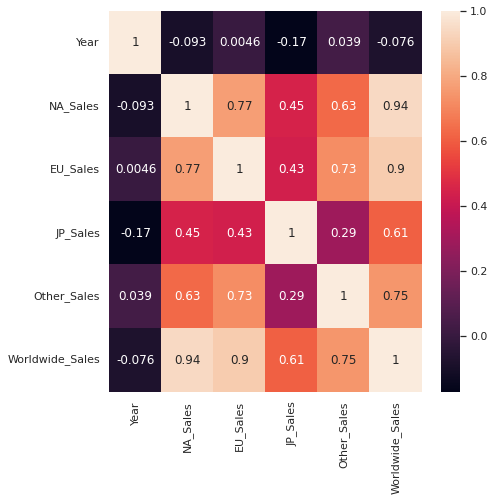

In [125]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(7,7))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)